In [82]:
from sklearn import datasets
import matplotlib.pyplot as plot
import numpy as np

<h3>Dataset</h3>

In [83]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [84]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [85]:
digits.images.shape

(1797, 8, 8)

In [86]:
digits.data.shape

(1797, 64)

In [87]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [88]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [89]:
img = digits.images[0]
img.shape

(8, 8)

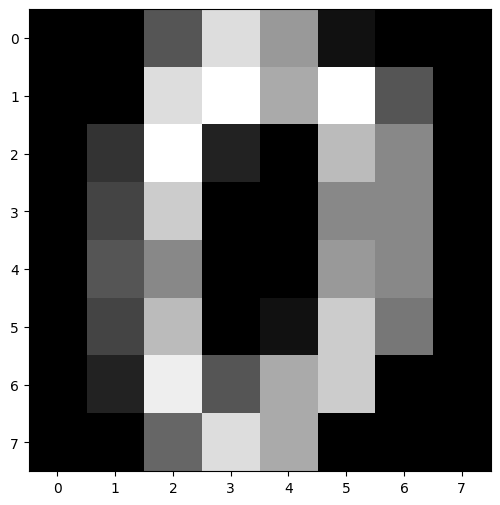

In [90]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap=plt.cm.gray)

In [91]:
def visual_multi(i):
    nplots=40
    fig = plt.figure(figsize=(8,4))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(digits.images[i+j], cmap=plt.cm.gray)

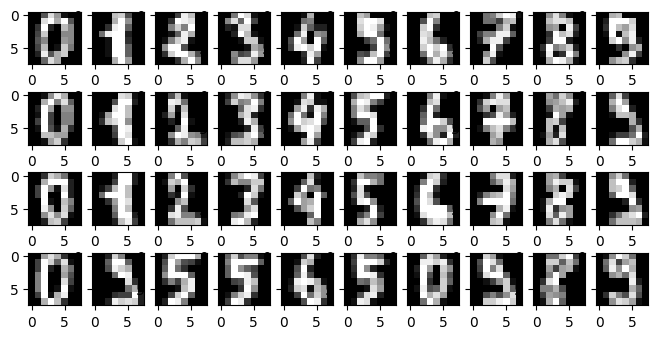

In [92]:
visual_multi(0)

<h3>Prepare Data</h3>

In [93]:
digits.images.shape

(1797, 8, 8)

In [94]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [95]:
n_sample = len(digits.images)
n_sample

1797

In [96]:
x = digits.images.reshape(n_sample, -1)
x.shape

(1797, 64)

In [97]:
x[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [98]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [99]:
y = digits.target
y[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

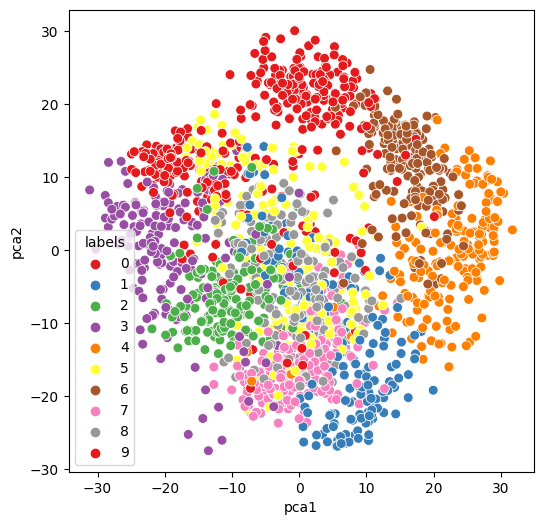

In [100]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df = pd.DataFrame(x_pca, columns=['pca1', 'pca2'])
df['labels'] = y

# sns.set_style("whi")
plt.rcParams['figure.figsize'] = 6,6
g = sns.scatterplot(data=df, x='pca1', y='pca2', hue='labels',
                    s=50, palette='Set1', legend='full')

In [101]:
x_pca.shape

(1797, 2)

<h3>Train-Test Split</h3>

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [103]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [105]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.961 0.944 0.983 0.989 0.939]
mean : 96.32838130609717


In [106]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.98      1.00      0.99        56
           2       0.98      1.00      0.99        56
           3       1.00      0.98      0.99        56
           4       1.00      0.98      0.99        61
           5       0.98      0.98      0.98        49
           6       1.00      1.00      1.00        42
           7       0.98      1.00      0.99        57
           8       0.98      0.96      0.97        52
           9       0.96      0.96      0.96        47

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

[[64  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  1 55  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  1  0]
 [ 0  0  0  0  0 48  0  0  0  1]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0

In [107]:
y_pred[:20]

array([0, 4, 1, 2, 0, 0, 8, 7, 6, 6, 3, 6, 9, 7, 4, 7, 4, 3, 2, 6])

Text(0.5, 1.0, 'Confusion Matrix')

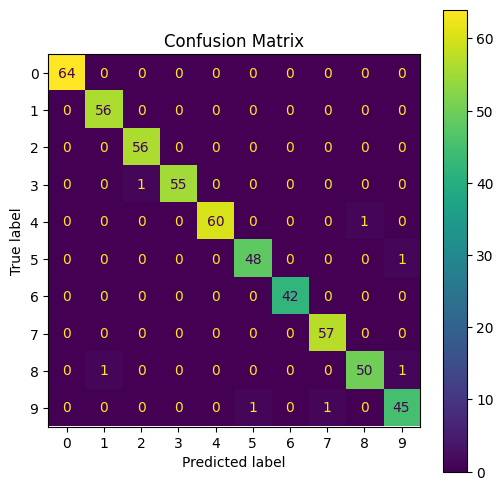

In [108]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")

In [109]:
idx_miss = np.where(y_test != y_pred)
print(idx_miss)

(array([ 59, 240, 257, 270, 361, 388, 456], dtype=int64),)


In [110]:
y_test[idx_miss]

array([4, 9, 5, 9, 8, 3, 8])

In [111]:
y_pred[idx_miss]

array([8, 7, 9, 5, 9, 2, 1])

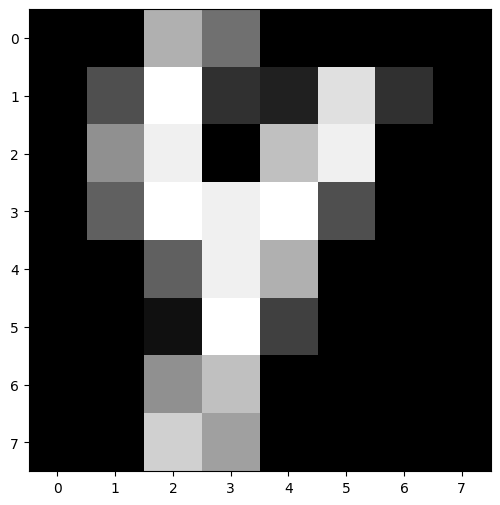

In [112]:
plt.imshow(x_test[idx_miss][0].reshape(8,8), cmap="gray")

<h3>Save Model</h3>

In [117]:
import joblib

joblib.dump(model, "digit_recognition_model.pkl")

['digit_recognition_model.pkl']

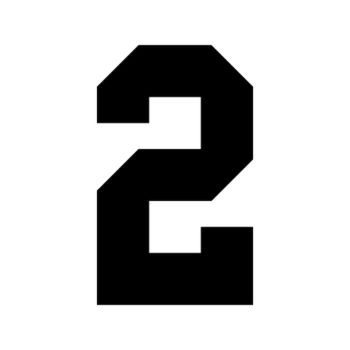

In [118]:
from PIL import Image, ImageOps

imgFile = 'DataSet/two.jpg'

img = Image.open(imgFile).convert("L")
img

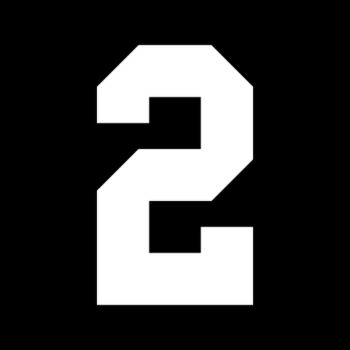

In [119]:
img = ImageOps.invert(img)
img

In [120]:
img =img.resize((8,8), Image.ANTIALIAS)
img

C:\Users\Two\AppData\Local\Temp\ipykernel_17652\383892459.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img =img.resize((8,8), Image.ANTIALIAS)


Text(0.5, 1.0, 'Prediction 8')

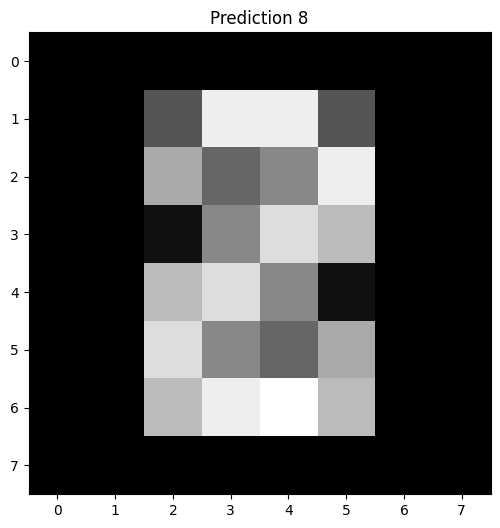

In [125]:
pixel = np.array(img)
pixel = pixel/255*16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1, -1)
predicted = model.predict(my_digit)

plt.imshow(pixel, cmap="gray")
plt.title("Prediction {}".format(predicted[0]))

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

model.fit(x_pca, y)

SVC()

C:\Users\Two\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'PCA2')

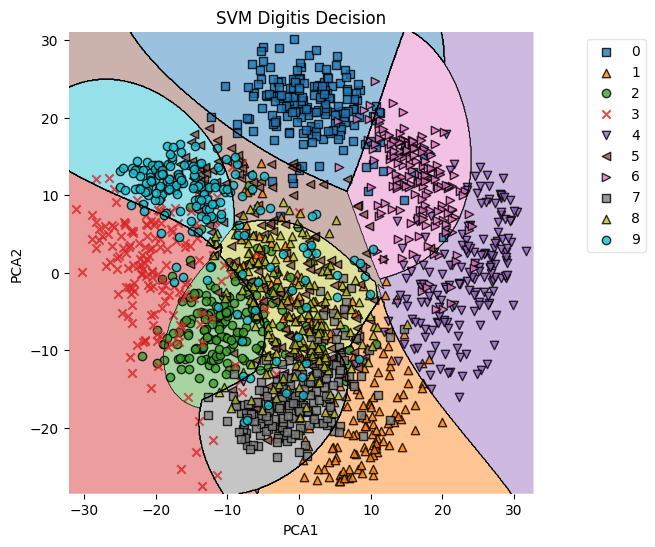

In [130]:
from mlxtend.plotting import plot_decision_regions

class_name = np.unique(y)

ax = plot_decision_regions(np.array(x_pca), y,
                           clf=model, legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_name, framealpha=0.5, loc="upper left", bbox_to_anchor=(1.1, 1.0))

plt.title("SVM Digitis Decision")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [131]:
cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.961 0.944 0.983 0.989 0.939]
mean : 96.32838130609717


<h3>Decision Tree</h3>

In [133]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
print(y_predict)

cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

[0 4 0 2 0 0 8 7 6 6 3 6 9 7 4 7 4 3 2 6 7 3 4 7 1 0 7 4 8 3 4 0 5 5 5 1 2
 9 0 0 0 8 2 3 7 0 2 7 1 3 8 4 2 9 6 0 4 3 9 4 7 9 9 5 0 3 7 4 9 1 7 0 9 3
 0 2 7 8 1 4 1 3 3 2 2 3 8 8 4 6 9 5 8 4 7 2 7 2 5 6 5 6 1 0 6 4 5 8 5 6 8
 8 8 6 0 0 2 4 9 0 8 5 8 4 2 0 5 9 0 1 8 4 2 3 6 2 2 7 1 3 5 8 5 2 7 4 9 2
 0 0 9 2 3 4 0 9 7 0 1 4 1 3 6 7 9 1 9 7 2 7 7 0 5 3 4 0 5 9 8 0 9 0 1 9 5
 4 8 2 6 0 9 7 8 8 9 3 0 9 9 3 6 3 7 9 0 2 7 6 5 3 1 0 4 7 1 0 5 3 7 3 2 3
 5 0 7 4 5 3 0 0 5 7 5 2 4 2 9 3 3 0 7 3 2 3 1 7 0 7 4 5 2 1 1 4 7 2 7 5 3
 8 2 5 0 9 2 0 7 6 5 4 3 1 4 1 2 0 7 4 2 1 3 4 9 5 5 3 0 5 5 3 6 1 4 3 8 5
 1 9 4 6 4 8 3 0 1 8 7 9 1 3 4 8 3 5 2 8 2 7 8 3 9 8 4 1 2 5 5 0 1 1 1 0 1
 1 4 4 6 9 9 4 1 1 5 0 8 2 6 3 3 4 4 7 6 6 8 3 6 6 2 0 1 5 8 2 2 7 6 7 0 8
 4 8 0 4 6 2 4 9 5 6 0 4 2 2 2 9 1 9 3 8 2 0 8 7 1 8 1 9 2 4 1 1 1 2 1 4 3
 0 0 9 6 6 5 5 8 3 7 4 6 8 1 3 6 4 3 2 6 8 2 3 2 1 4 1 4 8 6 3 2 8 2 0 0 2
 6 1 6 9 7 7 9 3 8 5 5 7 8 4 1 7 8 9 8 9 0 2 2 9 0 3 6 7 3 7 5 9 9 7 9 3 0
 5 7 5 8 5 2 7 2 5 0 8 9 

<h3>kNN</h3>

In [134]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
model.fit(x_train, y_train)

cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.936 0.961 0.969 0.981 0.953]
mean : 95.99458372021046


<h3>Logistic Regression</h3>

In [135]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", multi_class="auto")

cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.922 0.883 0.953 0.958 0.894]
mean : 92.21138966264316
